# *Path Integrals - Lévy Sampling*

`Doruk Efe Gökmen -- 19/08/2018 -- Ankara`

## Quantum statistical mechanics - Density matrices

In a thermal ensemble, the probability of being in $n$th energy eigenstate is given by the Boltzmann factor $\pi(n)\propto e^{-\beta E_n}$, where $\beta=\frac{1}{k_BT}$. Hence, e.g the probability $\pi(x,n)$ to be in state $n$ and in position $x$ is proportional to $e^{-\beta E_n}|\psi_n(x)|^2$.

We can consider the diagonal density matrix $\rho(x,x,\beta)=\sum_n e^{\beta E_n}\psi_n(x)\psi_n^*(x)$, which is the probability $\pi(x)$ of being at position $x$. This is a special case of the more general density matrix $\rho(x,x',\beta)=\sum_n e^{\beta E_n}\psi_n(x)\psi_n^*(x')$, which is the central object of quantum statistical mechanics. The partition function is given by $Z(\beta)=\text{Tr}\rho_u=\int_{-\infty}^\infty \rho_u(x,x,\beta)\text{d}x$, where $\rho_u=e^{-\beta \mathcal{H}}$ is the unnormalised density matrix. It follows that $\rho(\beta)=\frac{e^{-\beta\mathcal{H}}}{\text{Tr}(e^{-\beta\mathcal{H}})}$.

Properties of the density matrix:
* *The convolution property*: $\int \rho(x,x',\beta_1) \rho(x',x'',\beta_2) \text{d}x' = \int \text{d}x' \sum_{n,m} \psi_n(x)e^{-\beta_1 E_n} \psi_n^*(x')\psi_m(x')e^{-\beta_2 E_m}\psi_m^*(x'')$ $ = \sum_{n,m} \psi_n(x)e^{-\beta_1 E_n} \int \text{d}x' \psi_n^*(x')\psi_m(x')e^{-\beta_2 E_m}\psi_m^*(x'') = \sum_n \psi_n(x)e^{-(\beta_1+\beta_2)E_n}\psi_n^*(x'')=\rho(x,x'',\beta_1+\beta_2)$ $\implies \boxed{ \int \rho(x,x',\beta) \rho(x',x'',\beta) \text{d}x' = \rho(x,x'',2\beta)}$ (note that in the discrete case, this is just matrix squaring). **So, if we have the density matrix at temperature $T=k_B/\beta$ this equation allows us to compute the density matrix at temperature $T/2$**.

* *The free density matrix* for a system of infinte size is $\rho^\text{free}(x,x',\beta)=\frac{1}{\sqrt{2\pi\beta}}\exp{\left[-\frac{(x-x')^2}{2\beta}\right]}$. Notice that in the high temperature limit ($\beta\rightarrow 0$) the density matrix becomes classical: $\rho^\text{free}\rightarrow \delta(x-x')$. The quantum system exihibits its peculiar properties more visibly at low temperatures.

* *High temperature limit and the Trotter decomposition*. In general any Hamiltonian can be written as $\mathcal{H}=\mathcal{H}^\text{free}+V(x)$. At high temperatures ($\beta\rightarrow 0$) we can approximate the density matrix as $\rho(x,x',\beta)=e^{-\beta V(x)/2}\rho^\text{free}e^{-\beta V(x')/2}$ (Trotter expansion). Hence an explicit expression for the density matrix is available without solving the Schrödinger (or more preciesly Liouville) equation for any potential.

## Path integrals - Quantum Monte Carlo

### Path integral representation of the kernel

The kernel $K$ is the matrix element of the unitary time evolution operator $U(t_i-t_f)=e^{-i/\hbar(t_f-t_i)\mathcal{H}}$ in the position representation: $K(x_i,x_f;t_f-t_i)=\langle x_f  \left| U(t_f-t_i) \right| x_i \rangle$. We can write $K(x_i,x_f;t_f-t_i)=\langle x_f  \left| U^N((t_f-t_i)/N) \right| x_i \rangle$, that is, divide the time interval $[t_i,t_f]$ into $N$ equal intervals $[t_k,t_{k+1}]$ of length $\epsilon$, where $\epsilon=t_{k+1}-t_k=(t_f-t_i)/N$.

Then we can insert $N-1$ resolutions of identity ($\int_{-\infty}^\infty \text{d} x_k \left|x_k\rangle\langle x_k\right|$) to obtain

$K(x_i,x_f;t_f-t_i)= \left[\Pi_{k=1}^{N-1}\int_{-\infty}^\infty dx_k \right] \left[\Pi_{k=0}^{N-1} K(x_i,x_f;\epsilon = (t_f-t_i)/N)\right]$,

where $x_f=x_N$ and $x_i=x_0$. In the continuous limit, we would have 

$K(x_i,x_f;t_f-t_i)= \lim_{N\rightarrow\infty} \left[\Pi_{k=1}^{N-1}\int_{-\infty}^\infty dx_k \right] \left[\Pi_{k=0}^{N-1} K(x_i,x_f;\epsilon = (t_f-t_i)/N)\right]$. (A)

Let us now consider the limit $\epsilon\rightarrow 0$ ($N\rightarrow \infty$) to obtain the short time kernel $K(x_i,x_f;\epsilon)$ and thereby switching from discrete to the continuous limit. It is known that for small $\epsilon$ the Trotter formula implies that to a very good approximation 

$K(x_i,x_f;\epsilon = (t_f-t_i)/N) \simeq \langle x_{k+1}  \left| e^{-i(\hbar\epsilon T} e^{-i/\hbar \epsilon V} \right| x_k\rangle$,

which becomes exact as $\epsilon\rightarrow 0$. If we insert resolution of identity $\int \text{d}p_k \left| p_k \rangle\langle p_k \right|$, we get

$K(x_i,x_f;\epsilon) = \int_{-\infty}^\infty \text{d}p_k \langle x_{k+1}  \left| e^{-i(\hbar\epsilon T} \left| p_k \rangle\langle p_k \right| e^{-i/\hbar \epsilon V} \right| x_k\rangle = \int_{-\infty}^\infty \text{d}p_k \langle x_{k+1}  \left| p_k \rangle\langle p_k \right| x_k\rangle e^{-i/\hbar \epsilon \left(\frac{p_k}{2m} + V(x)\right)}$

$\implies K(x_i,x_f;\epsilon) = \frac{1}{2\pi \hbar}\int_{-\infty}^\infty \text{d}p_k e^{i/\hbar \epsilon \left[p_k\frac{x_{k+1}-x_k}{\epsilon}-\mathcal{H}(p_k,x_k) \right]}$. (B)

Hence, inserting (B) into (A) we get

$K(x_i,x_f;t_f-t_i) = \lim_{N\rightarrow \infty}\left[\Pi_{k=1}^{N-1}\int_{-\infty}^\infty dx_k \right] \left \{ \Pi_{k=0}^{N-1} \int_{-\infty}^\infty \text{d}p_k e^{i/\hbar \epsilon \left[p_k\frac{x_{k+1}-x_k}{\epsilon}-\mathcal{H}(p_k,x_k) \right]} \right\}$. (C)

We can simplify the exponent of the integrand in the limiting case $N\rightarrow \infty$, 

$\lim_{N\rightarrow \infty} \epsilon \sum_{k=0}^{N-1}\left[p_k\frac{x_{k+1}-x_k}{\epsilon}-\mathcal{H}(p_k,x_k) \right] =\int_{t_1}^{t_2}\text{d}t[p(t)\dot{x}(t)-\mathcal{H}[p(t),x(t)]]$

$=\int_{t_1}^{t_2}\text{d}t \mathcal{L}[x(t),\dot{x}(t)] = \mathcal{S}[x(t);t_f,t_i]$, (D)

where $\mathcal{L}[x(t),\dot{x}(t)] = \frac{m}{2}\dot{x}(t)^2-V[x(t)]$ is the Lagrangian and $\mathcal{S}[x(t);t_f,t_i]$ is the action between times $t_f$ and $t_i$.

Furthermore we can introduce the following notation for the integrals over *paths*:

$\lim_{N\rightarrow \infty}\left(\Pi_{k=1}^{N-1} \int_{-\infty}^\infty \text{d}x_k\right)=\int_{x(t_i)=x_i}^{x(t_f)=x_f}\mathcal{D}[x(t)]$, (E.1)

$\lim_{N\rightarrow \infty}\left(\Pi_{k=1}^{N-1}\int_{-\infty}^\infty\frac{\text{d}p_k}{2\pi\hbar}\right) =\int \mathcal{D}\left[\frac{p(t)}{2\pi\hbar}\right]$. (E.2)

Using (D) and (E) in (C), we get the path integral representation of the kernel

$K(x_i,x_f;t_f-t_i)= \int_{x(t_i)=x_i}^{x(t_f)=x_f}\mathcal{D}[x(t)] \int \mathcal{D}\left[\frac{p(t)}{2\pi\hbar}\right] e^{i/\hbar \mathcal{S}[x(t)]}$

$\implies \boxed{K(x_i,x_f;t_f-t_i)= \mathcal{N} \int_{x(t_i)=x_i}^{x(t_f)=x_f}\mathcal{D}[x(t)] e^{i/\hbar \mathcal{S}[x(t)]}}$, (F)

where $\mathcal{N}$ is the normalisation factor.

Here we see that each path has a phase proportional to the action. The equation (F) implies that we sum over all paths, which in fact interfere with one another. The true quantum mechanical amplitude is determined by the constructive and destructive interferences between these paths. For example, actions that are very large compared to $\hbar$, lead to very different phases even between nearby paths that differ only slightly, and that causes destructive interference between them. Only in the extremely close vicinity of the classical path $\bar x(t)$, where the action changes little when the phase varies, will neighbouring paths contirbute to the interference constructively. This leads to a classical deterministic path $\bar x(t)$, and this is why the classical approximation is valid when the action is very large compared to $\hbar$. Hence we see how the classical laws of motion arise from quantum mechanics.

### Path integral representation of the partition function
**Heuristic derivation of the discrete case:** Recall the convolution property of the density matrix, we can apply it repeatedly:

$\rho(x_0,x_2,\beta) = \int \rho(x_0,x_2,\beta/2) \rho(x_2,x_1,\beta/2) \text{d}x_2  = \int \int \int \rho(x_0,x_3,\beta/4) \rho(x_3, x_2,\beta/4) \rho(x_2,x_4,\beta/4) \rho(x_4,x_1 ,\beta/4) \text{d}x_2 \text{d}x_3 \text{d}x_4 = \cdots $ 

In other words: $\rho(x_0,x_N,\beta) = \int\int \cdots \int  \text{d}x_1 \text{d}x_2 \cdots \text{d}x_{N-1}\rho(x_0,x_1,\beta/N)\rho(x_1,x_2,\beta/N)\cdots\rho(x_{N-1},x_N,\beta/N)$. The variables $x_k$ in this integral is called a *path*. We can imagine the variable $x_k$ to be at position $x_k$ at given slice $k\beta/N$ of an imaginary time variable $\tau$ that goes from $0$ to $\beta$ in steps of $\Delta\tau=\beta/N$. Density matrices and partition functions can thus be expressed as multiple integrals over path variables, which are none other than the path integrals that were introduced in the previous subsection.

Given the unnormalised density matrix $\rho_u$, the discrete partition $Z_d(\beta)$ function can be written as a path integral for all ***closed*** paths (because of the trace property), i.e., paths with the same beginning and end points ($x_0=x_N$), over a “time” interval $−i\hbar\beta$.

$Z_d(\beta)= \text{Tr}(e^{-\beta \mathcal{H}}) = \text{Tr}(\rho_u(x_0,x_N,\beta) )=\int \text{d}x_0 \rho_u (x_0,x_N=x_0,\beta) $ $ = \int \int\int \cdots \int  \text{d}x_0 \text{d}x_1 \text{d}x_2 \cdots \text{d}x_{N-1}\rho_u(x_0,x_1,\beta/N)\rho_u(x_1,x_2,\beta/N)\cdots\rho_u(x_{N-1},x_N,\beta/N)\rho_u(x_{N-1},x_0,\beta/N)$. 

The integrand is the probabilistic weight $\Phi\left[\{x_i\}\right]$ of the discrete path consisting of points $\{x_i\}$. The continuous case can be obtained by taking the limit $N\rightarrow \infty$. By defining

$\Phi[x(\tau)] = \lim_{N\rightarrow \infty} \rho_u(x_0,x_1,\beta/N)\cdots \rho_u(x_{N-1},x_N,\beta/N)$, (G)

(note that this is the probability weight of a particular continuous path), and by using (E.1), we can express the continuous partition function $Z(\beta)$ as

$Z(\beta) = \int_{x(0)}^{x(\hbar \beta)=x(0)}\mathcal{D}[x(\tau)] \Phi[x(\tau)]$. (H)

But what is $\Phi[x(\tau)]$?

**Derivation of the continuous case:** Again we start from $Z(\beta)= \text{Tr}(e^{-\beta \mathcal{H}})$. The main point of the argument that follows is the operational resemblance between the unitary time evolution operator $U(t)=e^{-(i/\hbar) t\mathcal{H}}$ and the unnormalised density matrix $e^{-\beta \mathcal{H}}$:  the former is used to define the kernel which reads $K(x,x';t)=\langle x \left| e^{-(i/\hbar) t\mathcal{H}} \right| x' \rangle$; and the latter is used in defining the density matrix which reads $\rho(x,x';\beta)=\langle x \left| e^{-\beta \mathcal{H}} \right| x' \rangle$. If we regard $\beta$ as the analytic continuation of the real time $t$ to the imaginary values: $t\rightarrow i \tau \rightarrow i \hbar \beta$, and $t=t_i-t_f$, we get the cousin of the partition function that lives in the imaginary spacetime (i.e. Minkowskian rather than Euclidian, but this has nothing to do with relativity, or has it?)

$Z\left[\beta\rightarrow -\frac{i}{\hbar}(t_f-t_i)\right]=\text{Tr}\left[U(t_f-t_i)\right]=\int_{-\infty}^\infty \text{d}x \langle x \left| U(t_f-t_i) \right| x \rangle$

$=\int_{-\infty}^\infty \text{d}x K(x,x;t_f-t_i)$

$=\int_{-\infty}^\infty \text{d}x \mathcal{N} \int_{x(t_i)=x}^{x(t_f)=x}\mathcal{D}[x(t)] e^{i/\hbar \int_{t_i}^{t_f}\text{d}t \mathcal{L}[x(t),\dot{x}(t)]} $ (using (F))    

$=\mathcal{N} \int_{x(t_f)=x(t_i)}\mathcal{D}[x(t)] e^{i/\hbar \int_{t_i}^{t_f}\text{d}t \mathcal{L}[x(t),\dot{x}(t)]}          = \mathcal{N} \int_{x(t_f)=x(t_i)}\mathcal{D}[x(t)] e^{i/\hbar \int_{t_i}^{t_f}\text{d}t \left[\frac{m}{2}\dot{x}(t)^2-V[x(t)]\right]}$,

which means that one is integrating not over all paths but over all *closed* paths (loops) at $x$. We are now ready to get the path integral representation of the real partition function by making the transformations $t\rightarrow i\tau$ so that $t_i\rightarrow 0$ and $t_f\rightarrow -i\hbar \beta$ (also note that $\dot{x(t)}=\frac{\partial x(t)}{\partial t}\rightarrow -i \frac{\partial x(\tau)} {\partial \tau} = -i x'(\tau) \implies \dot{x}(t)^2 \rightarrow -x'(\tau)^2$):

$\implies Z(\beta)=\mathcal{N} \int_{x(\hbar \beta)=x(0)}\mathcal{D}[x(\tau)] e^{-\frac{1}{\hbar} \int_{0}^{\beta \hbar}\text{d}\tau\left( \frac{m}{2}x'(\tau)^2+V[x(\tau)]\right)}$

$\implies \boxed{ Z(\beta)=\mathcal{N} \int_{x(\hbar \beta)=x(0)}\mathcal{D}[x(\tau)] e^{-\frac{1}{\hbar} \int_{0}^{\beta \hbar}\text{d}\tau \mathcal{H}[p(\tau),x(\tau)]} }$. (I)

Notice that by comparing (H) and (I) we get an expression for the probabilistic weight $\Phi[x(\tau)]$ of a particular path $x(\tau)$, that is 

$\Phi[x(\tau)] = \lim_{N\rightarrow \infty} \rho_u(x_0,x_1;\beta/N)\cdots \rho_u(x_{N-1},x_N;\beta/N) = \exp{\left\{ e^{-\frac{1}{\hbar} \int_{0}^{\beta \hbar}\text{d}\tau \mathcal{H}[p(\tau),x(\tau)]}\right\}}$ (J), which is very intuitive, considering the definition of the unnormalised density matrix $\rho_u$. This is an intriguing result, since we were able to obtain the complete statistical description of a quantum mechanical system without the appearance of complex numbers. 

Because of this reason, using (J) it is easy to see why some paths contribute very little to the path integral: those are paths for which the exponent is very large due to high energy, and thus the integrand is negligibly small. *Furthermore, it is unnecessary to consider whether or not nearby paths cancel each other's contributions, for in the present case they do not interfere (since no complex numbers involved) i.e. all contributions add together with some being large and others small.*

#### Path integral Monte Carlo

In the algorithm, so called the *naïve path integral (Markov-chain) Monte Carlo*, we move from one path configuration consisting of $\{x_i\}$ to another one consisting of $\{x'_i\}$ by choosing a single position $x_k$ and by making a little displacement $\Delta x$ that can be positive or negative. We compute the weight before ($\Phi[\{x_i\}]$) this move and after ($\Phi[\{x'_i\}]$) the move and accept the move with the Metropolis acceptance rate (reject with certainty if the new weight is greater than the old one, smaller the new weight is, the higher the acceptance rate). Defining $\epsilon \equiv \beta/N$, we can approximate $\Phi[\{x_i\}]$ by making a Trotter decomposition *only around the point $x_k$*:

$\Phi\left[\{x_i\}\right]\approx \cdots \rho^\text{free}(x_{k-1},x_k;\epsilon) e^{-\frac{1}{2}\epsilon V(x_k)} e^{-\frac{1}{2}\epsilon V(x_k)} \rho^\text{free}(x_{k},x_{k+1};\epsilon)\cdots$.

Therefore, the acceptance ratio $\frac{\Phi\left[\{x'_i\}\right]}{\Phi\left[\{x_i\}\right]}$ can be approximated as


$\frac{\Phi\left[\{x'_i\}\right]}{\Phi\left[\{x_i\}\right]}\approx\frac{\rho^\text{free}(x_{k-1},x'_k;\epsilon) e^{-\epsilon V(x'_k)}\rho^\text{free}(x'_k,x_{k+1};\epsilon)}{\rho^\text{free}(x_{k-1},x_k;\epsilon) e^{-\epsilon V(x_k)} \rho^\text{free}(x_k,x_{k+1};\epsilon)}$.

This is implemented in the following program.

In [4]:
%pylab qt
import math, random, pylab, os

# Exact quantum position distribution:
def p_quant(x, beta):
    p_q = sqrt(tanh(beta / 2.0) / pi) * exp(- x**2.0 * tanh(beta / 2.0))
    return p_q

def rho_free(x, y, beta):        # free off-diagonal density matrix
    return math.exp(-(x - y) ** 2 / (2.0 * beta))

output_dir = 'snapshots_naive_harmonic_path'
if not os.path.exists(output_dir): os.makedirs(output_dir)

fig = pylab.figure(figsize=(6, 10))
def show_path(x, k, x_old, Accepted, hist_data, step, fig):
    pylab.clf()
    path = x + [x[0]] #Final position is the same as the initial position. 
    #Note that this notation appends the first element of x as a new element to x 
    y_axis = range(len(x) + 1) #construct the imaginary time axis
    
    ax = fig.add_subplot(2, 1, 1)
    #Plot the paths
    if Accepted:
        old_path = x[:] #save the updated path as the old path
        old_path[k] = x_old #revert the update to get the actual old path
        old_path = old_path + [old_path[0]] #final position is the initial position
        ax.plot(old_path, y_axis, 'ko--', label='old path')
    if not Accepted and step !=0:
        old_path = x[:]
        old_path[k] = x_old 
        old_path = old_path + [old_path[0]]
        ax.plot(old_path, y_axis, 'ro-', label='rejection', linewidth=3)
    ax.plot(path, y_axis, 'bo-', label='new path') #plot the new path
    ax.legend()
    ax.set_xlim(-2.5, 2.5)
    ax.set_ylabel('$\\tau$', fontsize=14)
    ax.set_title('Naive path integral Monte Carlo, step %i' % step)
    ax.grid()
    
    #Plot the histogram
    ax = fig.add_subplot(2, 1, 2)
    x = [a / 10.0 for a in range(-100, 100)]
    y = [p_quant(a, beta) for a in x]
    ax.plot(x, y, c='gray', linewidth=1.0, label='Exact quantum distribution')
    ax.hist(hist_data, 10, histtype='step', normed = 'True', label='Path integral Monte Carlo') #histogram of the sample
    ax.set_title('Position distribution at $T=%.2f$' % T)
    ax.set_xlim(-2.5, 2.5) #restrict the range over which the histogram is shown
    ax.set_xlabel('$x$', fontsize = 14)
    ax.set_ylabel('$\pi(x)=e^{-\\beta E_n}|\psi_n(x)|^2$', fontsize = 14)
    ax.legend(fontsize = 6)
    ax.grid()
    
    pylab.pause(0.2)
    pylab.savefig(output_dir + '/snapshot_%05i.png' % step)

beta = 4.0                                           # inverse temperature
T = 1 / beta
N = 8                                                # number of (imagimary time) slices
dtau = beta / N
delta = 1.0                                          # maximum displacement on one slice
n_steps = 4                                        # number of Monte Carlo steps
hist_data = []
x = [random.uniform(-1.0, 1.0) for k in range(N)]    # initial path (a position for each time)
show_path(x, 0, 0.0, False, hist_data, 0, fig)                       #show the initial path

for step in range(n_steps):
    #print 'step',step
    k = random.randint(0, N - 1)                     # randomly choose slice
    knext, kprev = (k + 1) % N, (k - 1) % N          # next/previous slices
    x_old = x[k]
    x_new = x[k] + random.uniform(-delta, delta)     # new position at slice k
    #calculate the weight before and after the move
    old_weight  = (rho_free(x[knext], x_old, dtau) *
                   rho_free(x_old, x[kprev], dtau) *
                   math.exp(-0.5 * dtau * x_old ** 2))
    new_weight  = (rho_free(x[knext], x_new, dtau) *
                   rho_free(x_new, x[kprev], dtau) *
                   math.exp(-0.5 * dtau * x_new ** 2))
    if random.uniform(0.0, 1.0) < new_weight / old_weight: #accept with metropolis acceptance rate
        x[k] = x_new
        Accepted = True
    else:
        Accepted = False
    show_path(x, k, x_old, Accepted, hist_data, step + 1, fig)   
    hist_data.append(x[k]) 

Populating the interactive namespace from numpy and matplotlib


![caption](path_integral.gif)

Note that the above program satisfies the detailed balance condition, is aperiodic and irreducible. However it is very slow, as it takes very long to explore all of the available configuration space.

To make progress, let us now move back by two steps: consider the free particle instead of the harmonic potential, and instead of sampling $x_k$ with random $k$ at each step, keep $k$ fixed: we modify the position $x_k$ between the fixed positions $x_{k\pm 1}$ with the Metropolis algorithm.

The distribution of the position $x_k$ between fixed values of $x_{k\pm 1}$ is a gaussian. This is not a coincidence. Because $\pi^\text{free}(x_k|x_{k-1},x_{k+1})\propto \rho^\text{free}(x_{k-1},x_k;\epsilon) \rho^\text{free}(x_{k},x_{k+1};\epsilon)\propto \exp{\left[\frac{(x_k-\langle x_k \rangle)^2}{2\sigma^2}\right]}$, i.e. the product of two gaussians is also a gaussian. Here we have the mean $\langle x_k \rangle = \frac{x_{k-1} + x_{k+1}}{2}$, and the variance $\sigma=\frac{\epsilon}{2}$.

On the other hand, since we can derive that the distribution is  a gaussian $\pi(x) = \sqrt{\tanh(\beta / 2) / \pi} \exp[-x^2 * \tanh(\beta/2)]$, we do not need to use the Metropolis algorithm. We can use direct sampling of the gaussian with the above mean and variance instead! However, instead of doing that, let us generalise the problem further.

Consider a position $x_k$ between $x'$ and $x''$ with corresponding intervals $\epsilon'$ and $\epsilon''$ (not necessarily equal), respectively. Then $\pi^\text{free}(x_k|x',x'')\propto \rho^\text{free}(x',x_k;\epsilon') \rho^\text{free}(x_{k},x'';\epsilon'')\propto \exp{\left[\frac{(x_k-\langle x_k \rangle)^2}{2\sigma^2}\right]}$ with the mean $\langle x_k \rangle = \frac{\epsilon''x' + \epsilon'x''}{\epsilon'+\epsilon''}$, and the variance $\sigma=\left(\frac{1}{\epsilon'} + \frac{1}{\epsilon''}\right)^{-1}$. 

Populating the interactive namespace from numpy and matplotlib


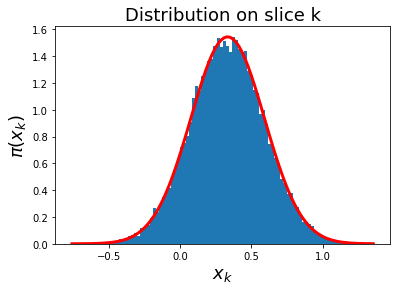

In [4]:
%pylab inline
import math, random, pylab

def rho_free(x, y, beta):
    return math.exp(-(x - y) ** 2 / (2.0 * beta))

dtau_prime  = 0.1
dtau_dprime = 0.2
x_prime  = 0.0
x_dprime = 1.0
delta = 1.0                 # maximum displacement of xk
n_steps = 100000            # number of Monte Carlo steps
data_hist = []
xk = 0.0                    # initial value of xk
for step in xrange(n_steps):
    xk_new = xk + random.uniform(-delta, delta)
    old_weight  = (rho_free(x_dprime, xk, dtau_dprime) *
                   rho_free(xk, x_prime, dtau_prime))
    new_weight  = (rho_free(x_dprime, xk_new, dtau_dprime) * 
                   rho_free(xk_new, x_prime, dtau_prime))
    if random.random() < new_weight / old_weight:
        xk = xk_new
    data_hist.append(xk)

def pi_analytic(xk, x_prime, x_dprime, dtau_prime, dtau_dprime):
    mean = (dtau_dprime * x_prime + dtau_prime * x_dprime) / (dtau_prime + dtau_dprime)
    sigma = 1.0 / math.sqrt(1.0 / dtau_prime + 1.0 / dtau_dprime)
    return math.exp(-(xk - mean) ** 2 / (2.0 * sigma ** 2)) / math.sqrt(2.0 * math.pi) / sigma

pylab.title('Distribution on slice k', fontsize=18)
histo, bin_edges, dummy = pylab.hist(data_hist, bins=100, normed=True)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
pylab.plot(bin_centers, [pi_analytic(x, x_prime, x_dprime, dtau_prime, dtau_dprime) for x in bin_centers], 'r-', lw=3)
pylab.xlabel('$x_k$', fontsize=18)
pylab.ylabel('$\pi(x_k)$', fontsize=18)
pylab.savefig('plot-path_slice.png')

#### Lévy sampling of quantum paths

$\pi(x_k | x', x'')$ gives the statistical weight of all paths that start at x' that pass through $x_k$ and that end up at $x''$. Let's apply this idea for $x_k = x_1 x' = x_0$ and $x'' = x_N$. We can sample the position $x_1$, given $x_0$ and $x_N $. Between the freshly sampled value of $x_1$ and $x_N$ we can then sample the value of $x_2$ and then of $x_3\cdots$ and eventually the entire path. Here we use $\pi^\text{free}(x_k|x',x'')\propto \exp{\left[\frac{(x_k-\langle x_k \rangle)^2}{2\sigma^2}\right]}$ with the mean $\langle x_k \rangle = \frac{\epsilon''x' + \epsilon'x''}{\epsilon'+\epsilon''}$, and the variance $\sigma=\left(\frac{1}{\epsilon'} + \frac{1}{\epsilon''}\right)^{-1}$ in order to apply this condition.

In [7]:
import math, random, pylab, os

fig = pylab.figure(figsize=(6, 10))
def show_path(x,step,title):
    path = x[:] #Final position is the same as the initial position. 
    #Note that this notation appends the first element of x as a new element to x 
    y_axis = range(len(x)) #construct the imaginary time axis
    #Plot the paths
    pylab.plot(path, y_axis, 'ko-')
    pylab.xlabel('$x$', fontsize = 14)
    pylab.ylabel('$\\tau$', fontsize=14)
    pylab.title(title, fontsize=14)
    pylab.xlim([-1,2])
    pylab.grid()
    pylab.savefig(output_dir + '/snapshot_%05i.png' % step)
    pylab.clf()
    
output_dir = 'snapshots_Levy_harmonic_path'
if not os.path.exists(output_dir): os.makedirs(output_dir)

beta = 1.0
N = 4
dtau = beta / N
nsteps = 100                     # number of paths to be generated
xstart, xend = 0.0, 1.0          # initial and final points
for step in range(nsteps):
    title = 'Levy sampling quantum path, step %i' % step
    x = [xstart] #initialise the path
    for k in range(1, N):        # loop over internal slices
        dtau_prime = (N - k) * dtau #current "time" step
        x_mean = (dtau_prime * x[k - 1] + dtau * xend) / \
                 (dtau + dtau_prime) #current mean is calculated from the above formula
        sigma = math.sqrt(1.0 / (1.0 / dtau + 1.0 / dtau_prime)) #current variance calculated similarly
        x.append(random.gauss(x_mean, sigma)) #generate a gaussian random variable using above parameters
    x.append(xend)
    show_path(x,step,title)

<Figure size 432x720 with 0 Axes>

![Levy sampling of the paths of a free particle](path_levy_free.gif)

Note that without the condition that the path will finish at $x_N$, this is simply a random walk.

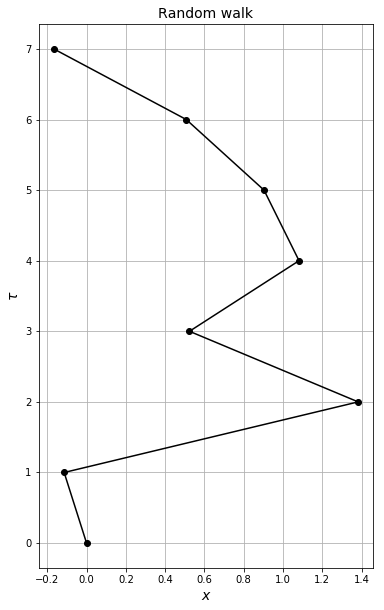

In [98]:
import math, random

beta = 4.0
N = 8
sigma = math.sqrt(beta / N)
x = [0.0]
title = 'Random walk'
for k in range(N - 1):
    x.append(random.gauss(x[-1], sigma))
fig = pylab.figure(figsize=(6, 10))
show_path(x,title)

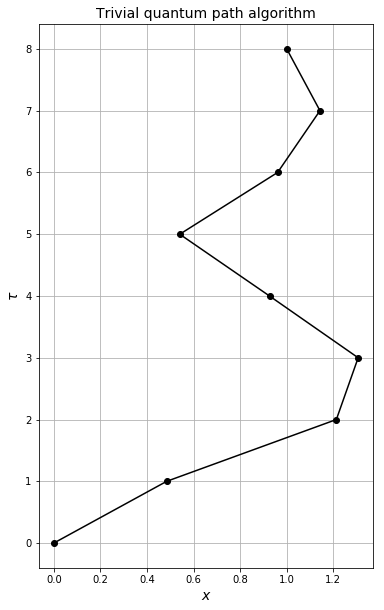

In [99]:
import math, random

beta = 1.0
N = 8
sigma = math.sqrt(beta / N)
xend = 1.0
Upsilon = [0.0]
title = 'Trivial quantum path algorithm'
for k in range(N):
    Upsilon.append(random.gauss(Upsilon[-1], sigma))
x = [0.0] + [Upsilon[k] + (xend - Upsilon[-1]) * \
             k / float(N) for k in range(1, N + 1)]
fig = pylab.figure(figsize=(6, 10))
show_path(x,title)

Since the harmonic oscillator density matrix is also a gaussian (see e.g. Feynman), we can use the Lévy sampling here.

Populating the interactive namespace from numpy and matplotlib


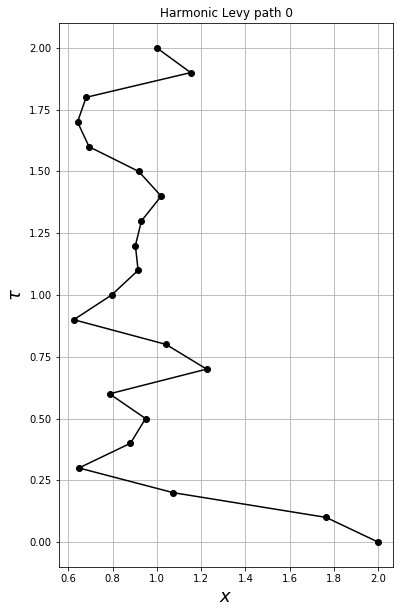

In [4]:
%pylab inline 
import math, random, pylab

beta = 2.0
N = 20
dtau = beta / N
nsteps = 1
xstart, xend = 2.0, 1.0
fig = pylab.figure(figsize=(6, 10))
for step in range(nsteps):
    pylab.clf()
    x = [xstart]
    for k in range(1, N):
        dtau_prime = (N - k) * dtau
        Ups1 = 1.0 / math.tanh(dtau) + \
               1.0 / math.tanh(dtau_prime)
        Ups2 = x[k - 1] / math.sinh(dtau) + \
               xend / math.sinh(dtau_prime)
        x.append(random.gauss(Ups2 / Ups1, \
                 1.0 / math.sqrt(Ups1)))
    x.append(xend)
    # graphics
    pylab.plot(x, [j * dtau for j in range(N + 1)], 'k-o')
    pylab.xlabel('$x$', fontsize=18)
    pylab.ylabel('$\\tau$', fontsize=18)
    pylab.title('Harmonic Levy path %i' % step)
    #pylab.xlim(-2.0, 4.0)
    pylab.grid()
    pylab.show()
    pylab.pause(0.1)

We can easily generalise this to the multidimensional case. We have no problem understanding that a three-dimensional harmonic oscillator quantum path can be sampled by independent Lévy constructions in x, y and z. The following is a 2D implementation.

In [91]:
%matplotlib qt
import math, random, os
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

def levy_harmonic_1d(start, end, dtau):
    x = [start]
    for k in range(1, N):
        dtau_prime = (N - k) * dtau
        Ups1 = 1.0 / math.tanh(dtau) + \
               1.0 / math.tanh(dtau_prime)
        Ups2 = x[k - 1] / math.sinh(dtau) + \
               end / math.sinh(dtau_prime)
        x.append(random.gauss(Ups2 / Ups1, \
                 1.0 / math.sqrt(Ups1)))
    x.append(end)
    return x

def show_path_2d(x,y,title):
    plt.gca(projection='3d')
    plt.plot(x, y, [j * dtau for j in range(N + 1)], 'k-o')
    plt.title(title)
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    plt.gca(projection='3d').set_zlabel('$\\tau$')
    plt.grid()
    plt.show()
    plt.pause(0.1)
    plt.clf()

output_dir = 'snapshots_Levy_2d_harmonic_path'
if not os.path.exists(output_dir): os.makedirs(output_dir)
    
beta = 1.0
N = 20
nsteps = 50
dtau = beta / float(N)
[xstart, ystart, zstart] = [1.0, -2.0, 1.5]
[xend, yend, zend] = [-2.5, 0.0, -0.5]

for step in range(nsteps):
    plt.clf()
    title = '2D quantum path %.i th step' % step
    x = levy_harmonic_1d(xstart, xend, dtau)
    y = levy_harmonic_1d(ystart, yend, dtau)
    #z = levy_harmonic_1d(zstart, zend, dtau)
    #for i in range(N + 1):
    #    print 'slice %2i:  ' % i, x[i], y[i], z[i]
    show_path_2d(x,y,title)
    plt.savefig(output_dir + '/snapshot_%05i.png' % step)

<Figure size 864x576 with 0 Axes>

![caption](Levy_2d_path.gif)

### Path sampling methods implemented

#### Preliminaries

***P.1.a*** The following program proposes uniformly distributed configurations in the heliport square (-1 to 1 in $x$, and -1 to 1 in $y$), then accepts these configurations with the mixed harmonic and quartic weight $\pi(x,y)=\exp[-0.5  (x^2 + y^2) - \alpha  (x^4 + y^4)]$, for $\alpha = 0.5$. Also produces a two-dimensional histogram to visualise the data. Note that this is a pure *rejection-sampling* algorithm.

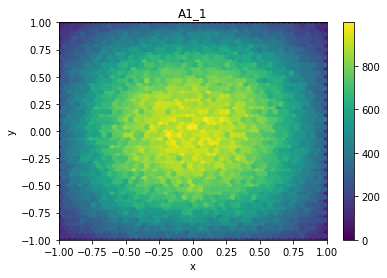

In [56]:
import random, math, pylab

alpha = 0.5
nsamples = 1000000
samples_x = []
samples_y = []
for sample in xrange(nsamples):
    while True:
        x = random.uniform(-1.0, 1.0)
        y = random.uniform(-1.0, 1.0)
        p = math.exp(-0.5 * (x ** 2 + y ** 2) - alpha * (x ** 4 + y ** 4))
        if random.uniform(0.0, 1.0) < p:
            break
    samples_x.append(x)
    samples_y.append(y)

pylab.hexbin(samples_x, samples_y, gridsize=50, bins=1000)
pylab.axis([-1.0, 1.0, -1.0, 1.0])
cb = pylab.colorbar()
pylab.xlabel('x')
pylab.ylabel('y')
pylab.title('A1_1')
pylab.savefig('plot_A1_1.png')
pylab.show()

***P.1.b*** The same algorithm can be implemented by proposing the random variables with gaussian distribution with a cutoff to restrict into the region $[-1,1]$. Then the algorithm becomes partly rejection-free for the harmonic part of $\pi(x,y)$. Note that the two programs do not agree for negative values of alpha.

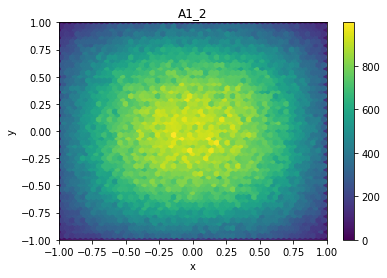

In [59]:
import random, math, pylab

def gauss_cut():
    while True:
        x = random.gauss(0.0, 1.0)
        if abs(x) <= 1.0:
            return x

alpha = 0.5
nsamples = 1000000
samples_x = []
samples_y = []
for sample in xrange(nsamples):
    while True:
        x = gauss_cut()
        y = gauss_cut()
        p = math.exp(- alpha * (x ** 4 + y ** 4))
        if random.uniform(0.0, 1.0) < p:
            break
    samples_x.append(x)
    samples_y.append(y)

pylab.hexbin(samples_x, samples_y, gridsize=50, bins=1000)
pylab.axis([-1.0, 1.0, -1.0, 1.0])
cb = pylab.colorbar()
pylab.xlabel('x')
pylab.ylabel('y')
pylab.title('A1_2')
pylab.savefig('plot_A1_2.png')
pylab.show()

***P.2.a*** We can break $\pi(x,y)$ into a product of one dimensional distributions, propose uniform random variables between -1, 1. Note that although a direct-sampling approach is used in the coordinate that is changed, this is now a *Markov-chain sampling* algorithm because the outcome of the move depends on the present configuration.

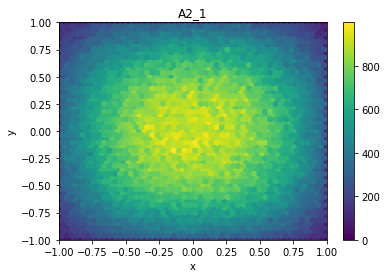

In [45]:
import random, math, pylab

alpha = 0.5
nsteps = 1000000
samples_x = []
samples_y = []
x, y = 0.0, 0.0
for step in range(nsteps):
    if step % 2 == 0:
        while True:
            x = random.uniform(-1.0, 1.0)
            p = math.exp(-0.5 * x ** 2 - alpha * x ** 4)
            if random.uniform(0.0, 1.0) < p:
                break
    else:
        while True:
            y = random.uniform(-1.0, 1.0)
            p = math.exp(-0.5 * y ** 2 - alpha * y ** 4)
            if random.uniform(0.0, 1.0) < p:
                break
    samples_x.append(x)
    samples_y.append(y)

pylab.hexbin(samples_x, samples_y, gridsize=50, bins=1000)
pylab.axis([-1.0, 1.0, -1.0, 1.0])
cb = pylab.colorbar()
pylab.xlabel('x')
pylab.ylabel('y')
pylab.title('A2_1')
pylab.savefig('plot_A2_1.png')
pylab.show()

***P.2.a*** Propose gaussian variables as in P.1.b.

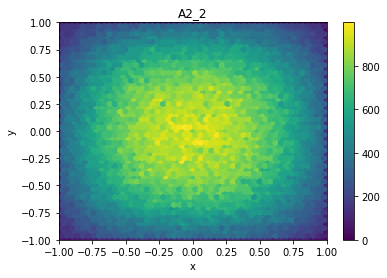

In [46]:
import random, math, pylab

def gauss_cut():
    while True:
        x = random.gauss(0.0, 1.0)
        if abs(x) <= 1.0:
            return x

alpha = 0.5
nsteps = 1000000
samples_x = []
samples_y = []
x, y = 0.0, 0.0
for step in range(nsteps):
    if step % 2 == 0:
        while True:
            x = gauss_cut()
            p = math.exp(-alpha * x ** 4)
            if random.uniform(0.0, 1.0) < p:
                break
    else:
        while True:
            y = gauss_cut()
            p = math.exp(-alpha * y ** 4)
            if random.uniform(0.0, 1.0) < p:
                break
    samples_x.append(x)
    samples_y.append(y)

pylab.hexbin(samples_x, samples_y, gridsize=50, bins=1000)
pylab.axis([-1.0, 1.0, -1.0, 1.0])
cb = pylab.colorbar()
pylab.xlabel('x')
pylab.ylabel('y')
pylab.title('A2_2')
pylab.savefig('plot_A2_2.png')
pylab.show()

***P.3.a*** Full-fledged Markov-chain Monte Carlo sampling using Metropolis algorithm:

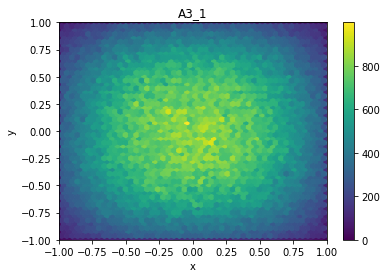

In [74]:
import random, math, pylab

alpha = 0.5
nsteps = 1000000
samples_x = []
samples_y = []
x, y = 0.0, 0.0
for step in range(nsteps):
    xnew = random.uniform(-1.0, 1.0)
    ynew = random.uniform(-1.0, 1.0)
    exp_new = - 0.5 * (xnew ** 2 + ynew ** 2) - alpha * (xnew ** 4 + ynew ** 4)
    exp_old = - 0.5 * (x ** 2 + y ** 2) - alpha * (x ** 4 + y ** 4)
    #Use the Metropolis algorithm:
    if random.uniform(0.0, 1.0) < math.exp(exp_new - exp_old): #the transition rate pi(x_old->x_new)
        x = xnew
        y = ynew
    samples_x.append(x)
    samples_y.append(y)

pylab.hexbin(samples_x, samples_y, gridsize=50, bins=1000)
pylab.axis([-1.0, 1.0, -1.0, 1.0])
cb = pylab.colorbar()
pylab.xlabel('x')
pylab.ylabel('y')
pylab.title('A3_1')
pylab.savefig('plot_A3_1.png')
pylab.show()

***P.3.b*** Again, we can improve the above program by proposing gaussian random variables instead of uniform random variables, hence the Metropolis acceptance rate simplifies.

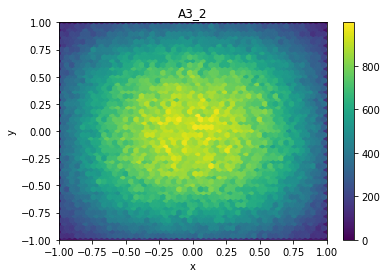

In [77]:
import random, math, pylab

def gauss_cut():
    while True:
        x = random.gauss(0.0, 1.0)
        if abs(x) <= 1.0:
            return x

alpha = 0.5
nsteps = 1000000
samples_x = []
samples_y = []
x, y = 0.0, 0.0
for step in range(nsteps):
    xnew = gauss_cut()
    ynew = gauss_cut()
    exp_new = - alpha * (xnew ** 4 + ynew ** 4)
    exp_old = - alpha * (x ** 4 + y ** 4)
    #Use the Metropolis algorithm:
    if random.uniform(0.0, 1.0) < math.exp(exp_new - exp_old): #the transition rate pi(x_old->x_new)
        x = xnew
        y = ynew
    samples_x.append(x)
    samples_y.append(y)

pylab.hexbin(samples_x, samples_y, gridsize=50, bins=1000)
pylab.axis([-1.0, 1.0, -1.0, 1.0])
cb = pylab.colorbar()
pylab.xlabel('x')
pylab.ylabel('y')
pylab.title('A3_2')
pylab.savefig('plot_A3_2.png')
pylab.show()

#### Harmonic oscillator

##### Naive sampling

The naive algorithm uses the Trotter decomposition formula, hence it is only correct in the limit $\beta/N \rightarrow 0$. Although it is slow, it provides a good approximation and constitutes an intuitive starting point. 

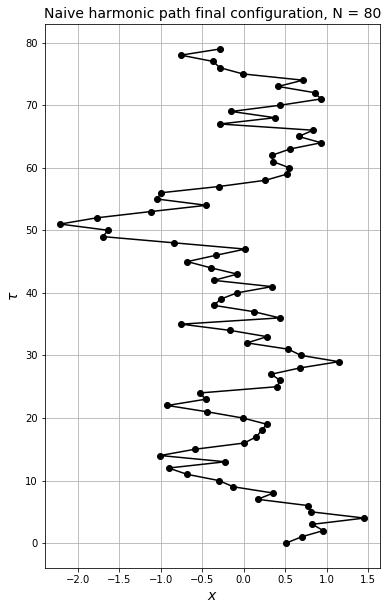

<Figure size 432x288 with 0 Axes>

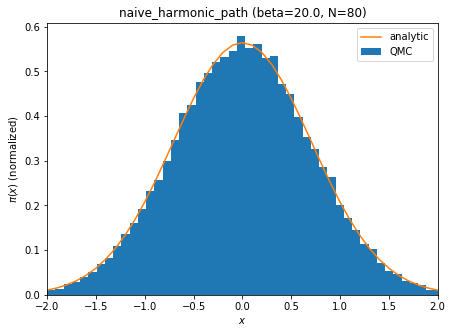

In [66]:
import math, random, pylab, os

def show_path(x, step, title):
    fig = pylab.figure(figsize=(6, 10))
    pylab.clf()
    path = x[:] #Final position is the same as the initial position. 
    #Note that this notation appends the first element of x as a new element to x 
    y_axis = range(len(x)) #construct the imaginary time axis
    #Plot the paths
    pylab.plot(path, y_axis, 'ko-')
    pylab.xlabel('$x$', fontsize = 14)
    pylab.ylabel('$\\tau$', fontsize=14)
    pylab.title(title, fontsize=14)
    pylab.grid()
    pylab.savefig('snapshot_%i.png' % step)

def rho_free(x, y, beta):
    return math.exp(-(x - y) ** 2 / (2.0 * beta))

beta = 20.0
N = 80
dtau = beta / N
delta = 1.0
n_steps = 4000000
x = [5.0] * N
#show_path(x, 1, 'initial configuration')
data = []
for step in range(n_steps):
    k = random.randint(0, N - 1)
    knext, kprev = (k + 1) % N, (k - 1) % N
    x_new = x[k] + random.uniform(-delta, delta)
    old_weight  = (rho_free(x[knext], x[k], dtau) *
                   rho_free(x[k], x[kprev], dtau) *
                   math.exp(-0.5 * dtau * x[k] ** 2))
    new_weight  = (rho_free(x[knext], x_new, dtau) *
                   rho_free(x_new, x[kprev], dtau) *
                   math.exp(-0.5 * dtau * x_new ** 2))
    if random.uniform(0.0, 1.0) < new_weight / old_weight:
        x[k] = x_new
    if step % N == 0:
        k = random.randint(0, N - 1)
        data.append(x[k])
        
#Write the final path configuration on a file:
filename = 'naive_harmonic_path_configuration_N%i.txt' % N
f = open(filename, 'w')
for i in range(N):
    f.write(str(x[i])+ '\n')
f.close()

show_path(x, step, 'Naive harmonic path final configuration, N = %i' %N)
pylab.show()

pylab.clf()
fig = pylab.figure(figsize=(7, 5))
pylab.hist(data, normed=True, bins=100, label='QMC')
list_x = [0.1 * a for a in range (-30, 31)]
list_y = [math.sqrt(math.tanh(beta / 2.0)) / math.sqrt(math.pi) * \
          math.exp(-x ** 2 * math.tanh(beta / 2.0)) for x in list_x]
pylab.plot(list_x, list_y, label='analytic')
pylab.legend()
pylab.xlabel('$x$')
pylab.ylabel('$\\pi(x)$ (normalized)')
pylab.title('naive_harmonic_path (beta=%s, N=%i)' % (beta, N))
pylab.xlim(-2, 2)
pylab.savefig('plot_B1_beta%s.png' % beta)
pylab.show()

##### Lévy sampling

The Lévy algorithm for the harmonic oscillator paths is exact, it uses no approximation.

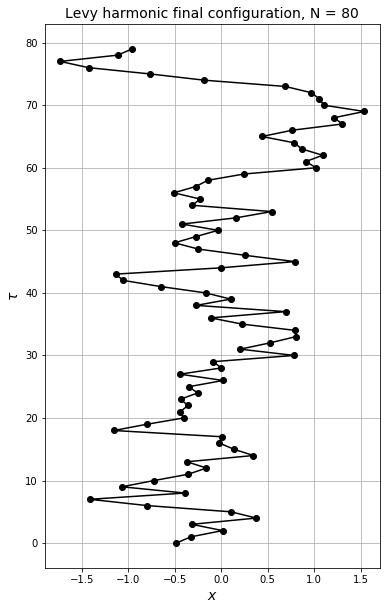

<Figure size 432x288 with 0 Axes>

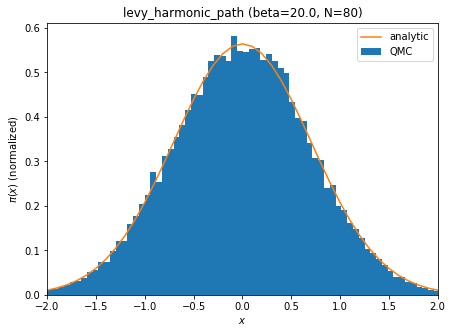

In [67]:
import math, random, pylab, os

def show_path(x, step, title):
    fig = pylab.figure(figsize=(6, 10))
    pylab.clf()
    path = x[:] #Final position is the same as the initial position. 
    #Note that this notation appends the first element of x as a new element to x 
    y_axis = range(len(x)) #construct the imaginary time axis
    #Plot the paths
    pylab.plot(path, y_axis, 'ko-')
    pylab.xlabel('$x$', fontsize = 14)
    pylab.ylabel('$\\tau$', fontsize=14)
    pylab.title(title, fontsize=14)
    pylab.grid()
    pylab.savefig('levy_snapshot_%i.png' % step)
    
def levy_harmonic_path(xstart, xend, dtau, N):
    x = [xstart]
    for k in range(1, N):
        dtau_prime = (N - k) * dtau
        Ups1 = 1.0 / math.tanh(dtau) + \
               1.0 / math.tanh(dtau_prime)
        Ups2 = x[k - 1] / math.sinh(dtau) + \
               xend / math.sinh(dtau_prime)
        x.append(random.gauss(Ups2 / Ups1, \
               1.0 / math.sqrt(Ups1)))
    return x

beta = 20.0
N = 80
dtau = beta / N
delta = 1.0
n_steps = 40000
x = [5.0] * N
data = []
for step in range(n_steps):
    Ncut = N/2
    x = x[Ncut:] + x[:Ncut] #slices the x data from the middle and swaps the two parts, hence x[0] changes
    x = levy_harmonic_path(x[0], x[0], dtau, N)
    k = random.randint(0, N - 1) 
    data.append(x[k])
        
#Write the final path configuration on a file:
filename = 'levy_harmonic_path_configuration_levy_N%i.txt' % N
f = open(filename, 'w')
for i in range(N):
    f.write(str(x[i])+ '\n')
f.close()

show_path(x, step, 'Levy harmonic final configuration, N = %i' %N)
pylab.show()

pylab.clf()
fig = pylab.figure(figsize=(7, 5))
pylab.hist(data, normed=True, bins=100, label='QMC')
list_x = [0.1 * a for a in range (-30, 31)]
list_y = [math.sqrt(math.tanh(beta / 2.0)) / math.sqrt(math.pi) * \
          math.exp(-x ** 2 * math.tanh(beta / 2.0)) for x in list_x]
pylab.plot(list_x, list_y, label='analytic')
pylab.legend()
pylab.xlabel('$x$')
pylab.ylabel('$\\pi(x)$ (normalized)')
pylab.title('levy_harmonic_path (beta=%s, N=%i)' % (beta, N))
pylab.xlim(-2, 2)
pylab.savefig('plot_B2_beta%s.png' % beta)
pylab.show()

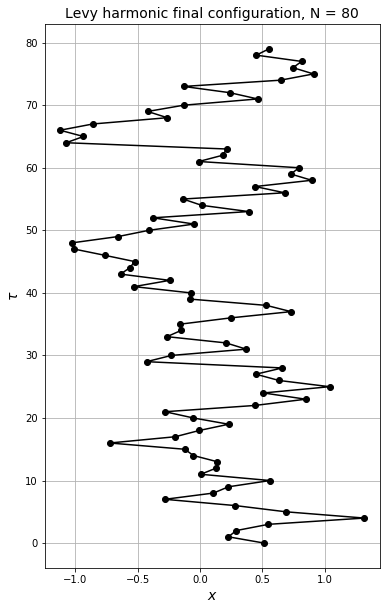

<Figure size 432x288 with 0 Axes>

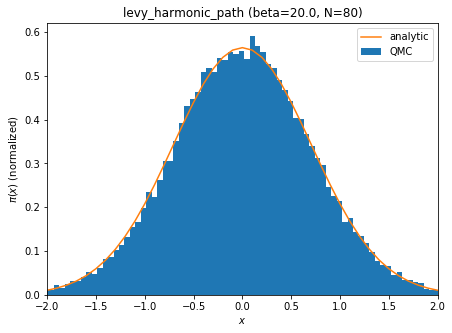

In [22]:
import math, random, pylab, os

def show_path(x, step, title):
    fig = pylab.figure(figsize=(6, 10))
    pylab.clf()
    path = x[:] #Final position is the same as the initial position. 
    #Note that this notation appends the first element of x as a new element to x 
    y_axis = range(len(x)) #construct the imaginary time axis
    #Plot the paths
    pylab.plot(path, y_axis, 'ko-')
    pylab.xlabel('$x$', fontsize = 14)
    pylab.ylabel('$\\tau$', fontsize=14)
    pylab.title(title, fontsize=14)
    pylab.grid()
    pylab.savefig('levy_snapshot_%i.png' % step)
    
def levy_harmonic_path(xstart, xend, dtau, N):
    x = [xstart]
    for k in range(1, N):
        dtau_prime = (N - k) * dtau
        Ups1 = 1.0 / math.tanh(dtau) + \
               1.0 / math.tanh(dtau_prime)
        Ups2 = x[k - 1] / math.sinh(dtau) + \
               xend / math.sinh(dtau_prime)
        x.append(random.gauss(Ups2 / Ups1, \
               1.0 / math.sqrt(Ups1)))
    return x

beta = 20.0
N = 80
dtau = beta / N
delta = 1.0
n_steps = 40000
x = [5.0] * N
data = []
for step in range(n_steps):
    sigma = 1.0 / math.sqrt( 2.0 * math.tanh( beta / 2.0))
    x[0] = random.gauss(0.0, sigma)
    x = levy_harmonic_path(x[0], x[0], dtau, N)
    k = random.randint(0, N - 1) 
    data.append(x[k])
        
##Write the final path configuration on a file:
#filename = 'levy_path_configuration_levy_2_N%i.txt' % N
#f = open(filename, 'w')
#for i in range(N):
#    f.write(str(x[i])+ '\n')
#f.close()

show_path(x, step, 'Levy harmonic final configuration, N = %i' %N)
pylab.show()

pylab.clf()
fig = pylab.figure(figsize=(7, 5))
pylab.hist(data, normed=True, bins=100, label='QMC')
list_x = [0.1 * a for a in range (-30, 31)]
list_y = [math.sqrt(math.tanh(beta / 2.0)) / math.sqrt(math.pi) * \
          math.exp(-x ** 2 * math.tanh(beta / 2.0)) for x in list_x]
pylab.plot(list_x, list_y, label='analytic')
pylab.legend()
pylab.xlabel('$x$')
pylab.ylabel('$\\pi(x)$ (normalized)')
pylab.title('levy_harmonic_path (beta=%s, N=%i)' % (beta, N))
pylab.xlim(-2, 2)
pylab.savefig('plot_B2_2_beta%s.png' % beta)
pylab.show()

#### Anharmonic oscillator

Using the approach introduced in the preliminaries of this section, we can sample the x points by free particle Lévy sampling. This allows us to avoid using the free density matrix ratios in the Metropolis acceptance rate; we only use the Trotter approximation corresponding to the potential, which is anharmonic in this case. Note that the following algorithm can be applied for any potential.

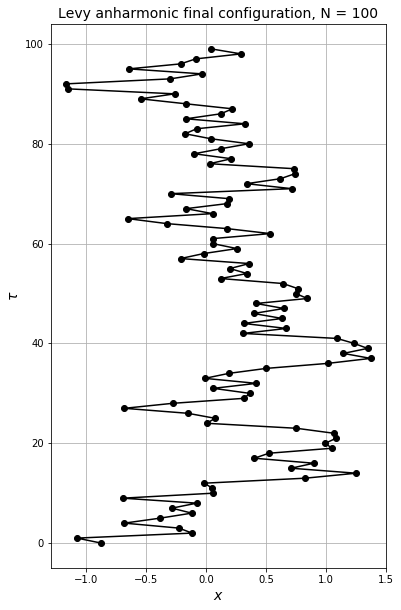

<Figure size 432x288 with 0 Axes>

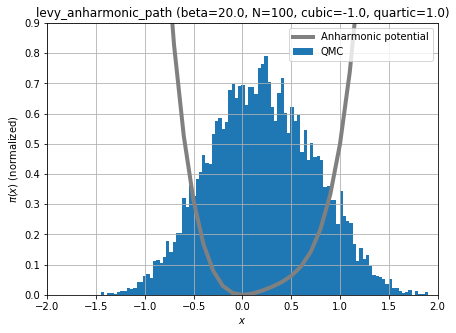

In [107]:
import math, random, pylab, os

def show_path(x, step, title):
    fig = pylab.figure(figsize=(6, 10))
    pylab.clf()
    path = x[:] #Final position is the same as the initial position. 
    #Note that this notation appends the first element of x as a new element to x 
    y_axis = range(len(x)) #construct the imaginary time axis
    #Plot the paths
    pylab.plot(path, y_axis, 'ko-')
    pylab.xlabel('$x$', fontsize = 14)
    pylab.ylabel('$\\tau$', fontsize=14)
    pylab.title(title, fontsize=14)
    pylab.grid()
    pylab.savefig('levy_snapshot_%i.png' % step)

def V(x, cubic, quartic):
    pot = x**2 / 2 + cubic * x**3 + quartic * x**4
    return pot

def levy_free_path(xstart, xend, dtau, N):
    x = [xstart]
    for k in range(1, N):
        dtau_prime = (N - k) * dtau
        x_mean = (dtau_prime * x[k - 1] + dtau * xend) / (dtau + dtau_prime)
        sigma = math.sqrt(1.0 / (1.0 / dtau + 1.0 / dtau_prime))
        x.append(random.gauss(x_mean, sigma))
    return x

beta = 20.0
N = 100
dtau = beta / N
delta = 1.0
n_steps = 10000
x = [1.0] * N
cubic, quartic = -1, 1
data = []
for step in range(n_steps):
    x_old = x[:]
    Ncut = 11 #pick a prime number ?
    x = x[Ncut:] + x[:Ncut] #slices the x data from Ncut'th element and swaps the two parts, hence x[0] changes
    x_new = levy_free_path(x[0], x[Ncut], dtau, Ncut) + x[Ncut:] #sample x points using free Levy sampling
    #This is why the free density matrix part is not necessary in the Metropolis acceptance rate
    #Metropolis algorithm
    if random.uniform(0,1) < math.exp(sum(-V(a, cubic, quartic) * dtau for a in x_new)) \
                            / math.exp(sum(-V(a, cubic, quartic) * dtau for a in x_old)): 
        x = x_new[:]
    k = random.randint(0, N - 1) 
    data.append(x[k])
        
#Write the final path configuration on a file:
filename = 'levy_anharmonic_path_configuration_levy_N%i.txt' % N
f = open(filename, 'w')
for i in range(N):
    f.write(str(x[i])+ '\n')
f.close()

show_path(x, step, 'Levy anharmonic final configuration, N = %i' %N)
pylab.show()

pylab.clf()
fig = pylab.figure(figsize=(7, 5))
T = 1 / beta
list_x = [0.1 * a for a in range (-30, 31)]
y = [V(a, cubic, quartic) for a in list_x]
pylab.plot(list_x, y, c='gray', linewidth=4.0, label='Anharmonic potential')
pylab.hist(data, normed=True, bins=100, label='QMC')
pylab.legend()
pylab.xlabel('$x$')
pylab.ylabel('$\\pi(x)$ (normalized)')
pylab.title('levy_anharmonic_path (beta=%s, N=%i, cubic=%.1f, quartic=%.1f)' % (beta, N, cubic, quartic))
pylab.xlim(-2, 2)
pylab.ylim(0, 0.9)
pylab.grid()
pylab.savefig('plot_C1_beta%s.png' % beta)
pylab.show()

Now, we can improve the performance of this program for even further for the special case of anharmonic potential. Since tha anharmonic potential contains the harmonic potential, we can sample the x[i] by harmonic Lévy sampling, and use the modified Metropolis acceptance rate (analogously to what is done in P.3.b).

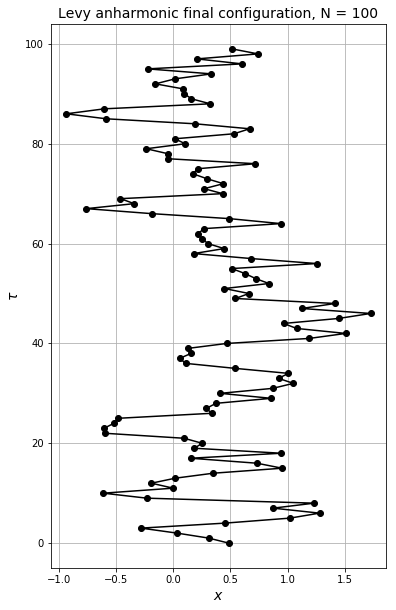

<Figure size 432x288 with 0 Axes>

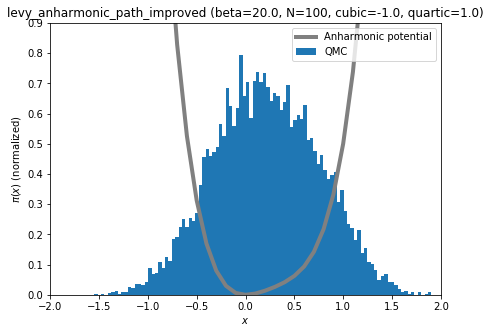

In [108]:
import math, random, pylab, os

def show_path(x, step, title):
    fig = pylab.figure(figsize=(6, 10))
    pylab.clf()
    path = x[:] #Final position is the same as the initial position. 
    #Note that this notation appends the first element of x as a new element to x 
    y_axis = range(len(x)) #construct the imaginary time axis
    #Plot the paths
    pylab.plot(path, y_axis, 'ko-')
    pylab.xlabel('$x$', fontsize = 14)
    pylab.ylabel('$\\tau$', fontsize=14)
    pylab.title(title, fontsize=14)
    pylab.grid()
    pylab.savefig('levy_snapshot_%i.png' % step)
    
def V_harm(x):
    pot = x**2 / 2
    return pot

def V_anharm(x, cubic, quartic):
    pot = x**2 / 2 + cubic * x**3 + quartic * x**4
    return pot

def levy_harmonic_path(xstart, xend, dtau, N):
    x = [xstart]
    for k in range(1, N):
        dtau_prime = (N - k) * dtau
        Ups1 = 1.0 / math.tanh(dtau) + \
               1.0 / math.tanh(dtau_prime)
        Ups2 = x[k - 1] / math.sinh(dtau) + \
               xend / math.sinh(dtau_prime)
        x.append(random.gauss(Ups2 / Ups1, \
               1.0 / math.sqrt(Ups1)))
    return x

beta = 20.0
N = 100
dtau = beta / N
delta = 1.0
n_steps = 10000
x = [1.0] * N
cubic, quartic = -1, 1
data = []
for step in range(n_steps):
    x_old = x[:]
    Ncut = 11 #pick a prime number ?
    x = x[Ncut:] + x[:Ncut] #slices the x data from Ncut'th element and swaps the two parts, hence x[0] changes
    x_new = levy_harmonic_path(x[0], x[Ncut], dtau, Ncut) + x[Ncut:] #sample x points using harmonic Levy sampling
    #This is why the free and harmonic density matrix part is not necessary in the Metropolis acceptance rate
    #Metropolis algorithm
    if random.uniform(0,1) < math.exp(sum(-(V_anharm(a, cubic, quartic) - V_harm(a)) * dtau for a in x_new)) \
                            / math.exp(sum(-(V_anharm(a, cubic, quartic) - V_harm(a)) * dtau for a in x_old)): 
        x = x_new[:]
    k = random.randint(0, N - 1) 
    data.append(x[k])
        
#Write the final path configuration on a file:
filename = 'improved_levy_anharmonic_path_configuration_levy_N%i.txt' % N
f = open(filename, 'w')
for i in range(N):
    f.write(str(x[i])+ '\n')
f.close()

show_path(x, step, 'Levy anharmonic final configuration, N = %i' %N)
pylab.show()

pylab.clf()
fig = pylab.figure(figsize=(7, 5))
T = 1 / beta
list_x = [0.1 * a for a in range (-30, 31)]
y = [V(a, cubic, quartic) for a in list_x]
pylab.plot(list_x, y, c='gray', linewidth=4.0, label='Anharmonic potential')
pylab.hist(data, normed=True, bins=100, label='QMC')
pylab.legend()
pylab.xlabel('$x$')
pylab.ylabel('$\\pi(x)$ (normalized)')
pylab.title('levy_anharmonic_path_improved (beta=%s, N=%i, cubic=%.1f, quartic=%.1f)' % (beta, N, cubic, quartic))
pylab.xlim(-2, 2)
pylab.ylim(0, 0.9)
pylab.savefig('plot_C2_beta%s.png' % beta)
pylab.show()

#### Mexican hat



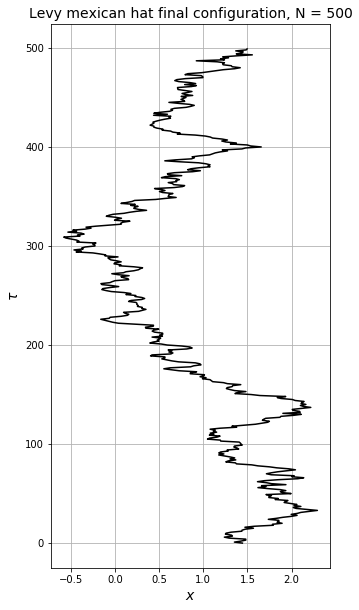

<Figure size 432x288 with 0 Axes>

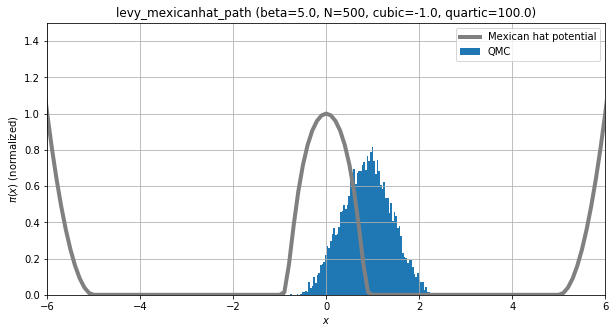

In [181]:
import math, random, pylab, os

def show_path(x, step, title):
    fig = pylab.figure(figsize=(5, 10))
    pylab.clf()
    path = x[:] #Final position is the same as the initial position. 
    #Note that this notation appends the first element of x as a new element to x 
    y_axis = range(len(x)) #construct the imaginary time axis
    #Plot the paths
    pylab.plot(path, y_axis, 'k-')
    pylab.xlabel('$x$', fontsize = 14)
    pylab.ylabel('$\\tau$', fontsize=14)
    pylab.title(title, fontsize=14)
    #pylab.xlim(-6, 6)
    pylab.grid()
    pylab.savefig('levy_snapshot_%i.png' % step)

def V(x, barrier):
    if x < -5.0:    return (x + 5.0) ** 2 #barrier on the left hand side
    elif x > 5.0:   return (x - 5.0) ** 2 #barrier on the left hand side
    elif x <= -1.0: return 0.0 #0 potential in between the left wall and the bump barrier
    elif x < 1.0:   return numpy.exp(-1.0 / (1.0 - x ** 2)) * numpy.exp(barrier) * barrier #gaussian bump barrier
    else:           return 0.0 #0 potential elsewhere
    
def levy_free_path(xstart, xend, dtau, N):
    x = [xstart]
    for k in range(1, N):
        dtau_prime = (N - k) * dtau
        x_mean = (dtau_prime * x[k - 1] + dtau * xend) / (dtau + dtau_prime)
        sigma = math.sqrt(1.0 / (1.0 / dtau + 1.0 / dtau_prime))
        x.append(random.gauss(x_mean, sigma))
    return x

beta = 5.0
N = 500
dtau = beta / N
delta = 1.0
n_steps = 10000
x = [1.0] * N
barrier = 1.0
data = []
for step in range(n_steps):
    x_old = x[:]
    Ncut = 11 #pick a prime number ?
    x = x[Ncut:] + x[:Ncut] #slices the x data from Ncut'th element and swaps the two parts, hence x[0] changes
    x_new = levy_free_path(x[0], x[Ncut], dtau, Ncut) + x[Ncut:] #sample x points using free Levy sampling
    #This is why the free density matrix part is not necessary in the Metropolis acceptance rate
    #Metropolis algorithm
    if random.uniform(0,1) < math.exp(sum(-V(a, barrier) * dtau for a in x_new)) \
                            / math.exp(sum(-V(a, barrier) * dtau for a in x_old)): 
        x = x_new[:]
    k = random.randint(0, N - 1) 
    data.append(x[k])
        
#Write the final path configuration on a file:
filename = 'mexicanhat_path_configuration_levy_N%i.txt' % N
f = open(filename, 'w')
for i in range(N):
    f.write(str(x[i])+ '\n')
f.close()

show_path(x, step, 'Levy mexican hat final configuration, N = %i' %N)
pylab.show()

pylab.clf()
fig = pylab.figure(figsize=(10, 5))
T = 1 / beta
list_x = [0.1 * a for a in range (-90, 91)]
y = [V(a, barrier) for a in list_x]
pylab.plot(list_x, y, c='gray', linewidth=4.0, label='Mexican hat potential')
pylab.hist(data, normed=True, bins=100, label='QMC')
pylab.legend()
pylab.xlabel('$x$')
pylab.ylabel('$\\pi(x)$ (normalized)')
pylab.title('levy_mexicanhat_path (beta=%s, N=%i, cubic=%.1f, quartic=%.1f)' % (beta, N, cubic, quartic))
pylab.xlim(-6, 6)
pylab.ylim(0, 1.5)
pylab.grid()
pylab.savefig('plot_mexicanhat_beta%s.png' % beta)
pylab.show()

In [ ]:
%pylab qt
import math, random, pylab, os

output_dir = 'snapshots_Levy_mexicanhat_path'
if not os.path.exists(output_dir): os.makedirs(output_dir)
    
fig = pylab.figure(figsize=(5, 10))

def show_path(x, hist_data, beta, barrier, step, fig):
    pylab.clf()
    path = x[:]  
    #Note that this notation appends the first element of x as a new element to x 
    y_axis = range(len(x)) #construct the imaginary time axis
    ax = fig.add_subplot(2, 1, 1)
    #Plot the path
    ax.plot(path, y_axis, 'k-', label='path')
    #ax.legend()
    ax.set_xlim(-6, 6)
    ax.set_ylabel('$\\tau$', fontsize=14)
    ax.set_title('Levy path integral Monte Carlo, step %i \n beta=%s, N=%i, barrier height$\sim$%.1f' % (step, beta, N, barrier))
    ax.grid()
    
    #Plot the histogram
    T = 1.0 / beta
    ax = fig.add_subplot(2, 1, 2)
    list_x = [0.1 * a for a in range (-90, 91)]
    y = [V(a, barrier) for a in list_x]
    temp = [T] * 2
    pylab.plot([-6,6], temp, '-', color=plt.cm.cool(step), linewidth=2.0, label='Thermal energy:$k_B T$')
    pylab.plot(list_x, y, c='gray', linewidth=4.0, label='Mexican hat potential')
    ax.hist(hist_data, 10, histtype='step', normed = 'True', label='Position distribution') #histogram of the sample
    ax.set_xlim(-6, 6) #restrict the range over which the histogram is shown
    ax.set_ylim(0, 1.5)
    ax.set_xlabel('$x$', fontsize = 14)
    ax.set_ylabel('$\pi(x)$', fontsize = 14)
    ax.legend(fontsize = 9)
    ax.grid()
    
    pylab.pause(0.2)
    pylab.savefig(output_dir + '/snapshot_%05i.png' % step)

def V(x, barrier):
    if x < -5.0:    return (x + 5.0) ** 2 #barrier on the left hand side
    elif x > 5.0:   return (x - 5.0) ** 2 #barrier on the left hand side
    elif x <= -1.0: return 0.0 #0 potential in between the left wall and the bump barrier
    elif x < 1.0:   return numpy.exp(-1.0 / (1.0 - x ** 2)) * numpy.exp(barrier) * barrier #gaussian bump barrier
    else:           return 0.0 #0 potential elsewhere
    
def levy_free_path(xstart, xend, dtau, N):
    x = [xstart]
    for k in range(1, N):
        dtau_prime = (N - k) * dtau
        x_mean = (dtau_prime * x[k - 1] + dtau * xend) / (dtau + dtau_prime)
        sigma = math.sqrt(1.0 / (1.0 / dtau + 1.0 / dtau_prime))
        x.append(random.gauss(x_mean, sigma))
    return x

beta = 256.0
N = 100
dtau = beta / N
delta = 1.0
n_steps = 10000
x = [1.0] * N
barrier = 0.5
data = []
for step in range(n_steps):
    x_old = x[:]
    Ncut = 11 #pick a prime number ?
    x = x[Ncut:] + x[:Ncut] #slices the x data from Ncut'th element and swaps the two parts, hence x[0] changes
    x_new = levy_free_path(x[0], x[Ncut], dtau, Ncut) + x[Ncut:] #sample x points using free Levy sampling
    #This is why the free density matrix part is not necessary in the Metropolis acceptance rate
    #Metropolis algorithm
    if random.uniform(0,1) < math.exp(sum(-V(a, barrier) * dtau for a in x_new)) \
                            / math.exp(sum(-V(a, barrier) * dtau for a in x_old)): 
        x = x_new[:]
    k = random.randint(0, N - 1) 
    data.append(x[k])
    show_path(x, data, beta, barrier, step, fig)
    if step % 30 == 0:
        beta /= 2 #increase the temperature by twice at each 50 steps

![caption](mexicanhat.gif)